<a href="https://colab.research.google.com/github/naokityokoyama/Deep_Learing/blob/main/Deep_Learing_Convolucional_MNIST_Numero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout #4 etapa, 3 etapa
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, Convolution2D  #1 etapa, 2 etapa

In [2]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Classe2')

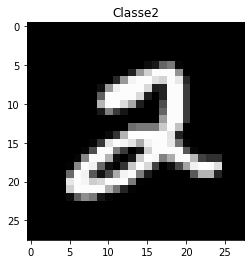

In [3]:
# imagem passado em gray assim ficaria 1 canal
plt.imshow(X_treino[5], cmap='gray')
plt.title('Classe' + str(y_treino[5]))

In [4]:
#converte os dados para o formato tensor flow
X_treino.shape[0]
X_train = X_treino.reshape(X_treino.shape[0], 28, 28, 1)  #instancias, altura, largura, 1 canal
X_test = X_teste.reshape(X_teste.shape[0], 28, 28, 1) 

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
#precisa converte esse type 
X_train.dtype

dtype('uint8')

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_test.dtype

dtype('float32')

In [9]:
#escala dos valores 
#colocar a escala entre 0 e 1 para ficar mais rapido o processamento

X_train /= 255 #rgb bit vai entre 1 e 255
X_test /= 255

In [ ]:
X_train[0]

In [11]:
#transforma as classes em dummy pois vamos prever 10 classes (0 a 9)

y_train = np_utils.to_categorical(y_treino, 10) # 10 é o numero de classes
y_test = np_utils.to_categorical(y_teste, 10)

In [12]:
y_train[0] , y_treino[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

In [46]:
#rede Neural
#32 é um valor para altear os kernels (uma boa pratica é 64 mas aqui passamos 32)
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
classificador.add(MaxPool2D(pool_size=(2,2)))
classificador.add(Flatten())
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dense(units=10, activation='softmax'))

classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

classificador.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 27s 56ms/step - loss: 0.4434 - accuracy: 0.8775 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 2/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0524 - val_accuracy: 0.9824
Epoch 3/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0593 - val_accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.0530 - val_accuracy: 0.9829
Epoch 5/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0466 - val_accuracy: 0.9855


In [48]:
resultado = classificador.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0466 - accuracy: 0.9855


### Melhorias

In [49]:
#melhorias # 2 camadas de convolução (o flatten só pode passar 1x pois ele achata a entrad)
from tensorflow.python.keras.layers.normalization import BatchNormalization

In [56]:
classificador = Sequential()

classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
classificador.add(BatchNormalization()) # normalizando os numeros na camada de convolução
classificador.add(MaxPool2D(pool_size=(2,2)))
#classificador.add(Flatten())

classificador.add(Conv2D(32, (3,3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPool2D(pool_size=(2,2)))
classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=10, activation='softmax'))

classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

classificador.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 54s 113ms/step - loss: 0.4688 - accuracy: 0.8512 - val_loss: 0.1411 - val_accuracy: 0.9617
Epoch 2/5
469/469 [==============================] - 53s 113ms/step - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 3/5
469/469 [==============================] - 53s 113ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 4/5
469/469 [==============================] - 53s 114ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 5/5
469/469 [==============================] - 53s 112ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0368 - val_accuracy: 0.9903
